In [57]:
#import required packages
#使用ib_insync是一个能比较简单的提取数据的包（相比于ib_api自带的功能）
import pandas as pd
from ib_insync import *
util.startLoop()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

In [58]:
#establish connection with IB TWS
ib = IB()
ib.connect('127.0.0.1', 7496, clientId=100)

<IB connected to 127.0.0.1:7496 clientId=100>

In [59]:
# #因为我们现在使用的是demo mode，所以这里使用汇率作为取数据演示
# contract = Forex('USDJPY')
# bars = ib.reqHistoricalData(
#     contract, endDateTime='', durationStr='1 Y',
#     barSizeSetting='1 day', whatToShow='MIDPOINT', useRTH=True)

# # convert to pandas dataframe:
# df = util.df(bars)
# df.head()

In [60]:
contract = Stock('SPY', 'SMART', 'USD')
dt = ''
barsList = []
while True:
    bars = ib.reqHistoricalData(
        contract,
        endDateTime=dt,
        durationStr='10 D',
        barSizeSetting='1 min',
        whatToShow='ADJUSTED_LAST',
        useRTH=True,
#         formatDateb=1
    )
    if not bars:
        break
    barsList.append(bars)
    dt = bars[0].date
    print(dt)
# save to CSV file
allBars = [b for bars in reversed(barsList) for b in bars]
df = util.df(allBars)

Error 321, reqId 14: Error validating request:-'bS' : cause - End date not supported with adjusted last, contract: Stock(symbol='SPY', exchange='SMART', currency='USD')


2020-03-23 21:30:00


In [61]:
df.set_index('date', inplace=True)

Text(0.5, 1.0, 'SPY Live Minute Data')

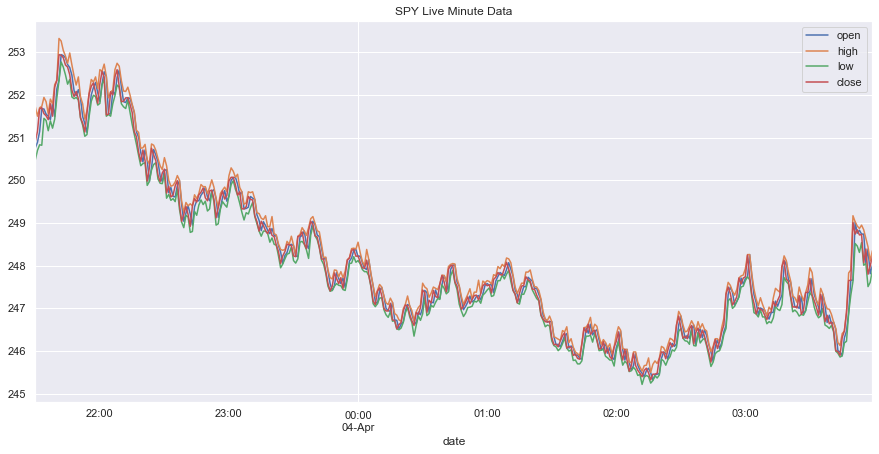

In [64]:
df[['open','high','low','close']].tail(390).plot(figsize = (15,7))
plt.title("SPY Live Minute Data")

In [66]:
df.tail(390)

,open,high,low,close,volume,average,barCount
date,,,,,,,
2020-04-03 21:30:00,250.76,251.72,250.48,250.91,10580,251.030,3929
2020-04-03 21:31:00,250.89,251.50,250.70,251.15,4224,251.106,2475
2020-04-03 21:32:00,251.14,251.70,250.83,251.67,4232,251.279,2245
2020-04-03 21:33:00,251.67,251.73,250.82,251.70,5349,251.210,3740
2020-04-03 21:34:00,251.67,251.94,251.45,251.56,5078,251.718,3445
...,...,...,...,...,...,...,...
2020-04-04 03:55:00,248.74,248.84,248.01,248.07,8755,248.374,4906
2020-04-04 03:56:00,248.06,248.64,248.05,248.39,7024,248.409,3684
2020-04-04 03:57:00,248.39,248.44,247.51,247.80,9634,247.862,4812


In [67]:
Option?

In [108]:
option = Option('SPY', '20200416', 250, 'C', 'SMART', multiplier=100)
calc = ib.calculateImpliedVolatility(
    option, optionPrice=3.35, underPrice=248.21)
print(calc)
# calc = ib.calculateOptionPrice(
# option, volatility=0.14, underPrice=525)
# print(calc)

Error 200, reqId 40: No security definition has been found for the request, contract: Option(symbol='SPY', lastTradeDateOrContractMonth='20200416', strike=250, right='C', multiplier=100, exchange='SMART')


[]


In [70]:
ib.calculateImpliedVolatility?

In [96]:
#因为demo mode所以现在会出现报错，使用实盘账户的话，应该可以跑通
code = "TSLA"
contract = Stock(symbol=code, exchange="SMART", currency="USD")
bars = ib.reqHistoricalData(contract, endDateTime='20190314 18:30:00', durationStr='5 D',
        barSizeSetting='30 secs', whatToShow='MIDPOINT', useRTH=True)
 
# convert to pandas dataframe:
df = util.df(bars)
print(df[['date', 'open', 'high', 'low', 'close']])


                    date     open     high      low    close
0    2019-03-07 22:30:00  278.860  279.760  278.600  278.930
1    2019-03-07 22:30:30  278.930  278.930  278.130  278.485
2    2019-03-07 22:31:00  278.485  279.385  278.205  279.300
3    2019-03-07 22:31:30  279.300  280.695  279.285  280.455
4    2019-03-07 22:32:00  280.455  280.590  279.415  280.295
...                  ...      ...      ...      ...      ...
3895 2019-03-14 03:57:30  288.830  288.955  288.830  288.915
3896 2019-03-14 03:58:00  288.915  288.950  288.850  288.920
3897 2019-03-14 03:58:30  288.920  288.940  288.820  288.820
3898 2019-03-14 03:59:00  288.820  288.950  288.795  288.810
3899 2019-03-14 03:59:30  288.810  288.995  288.775  288.945

[3900 rows x 5 columns]


In [90]:
df

,date,open,high,low,close,volume,average,barCount
0,2019-03-07 22:30:00,278.860,279.760,278.600,278.930,-1,-1.0,-1
1,2019-03-07 22:30:30,278.930,278.930,278.130,278.485,-1,-1.0,-1
2,2019-03-07 22:31:00,278.485,279.385,278.205,279.300,-1,-1.0,-1
3,2019-03-07 22:31:30,279.300,280.695,279.285,280.455,-1,-1.0,-1
4,2019-03-07 22:32:00,280.455,280.590,279.415,280.295,-1,-1.0,-1
...,...,...,...,...,...,...,...,...
3895,2019-03-14 03:57:30,288.830,288.955,288.830,288.915,-1,-1.0,-1
3896,2019-03-14 03:58:00,288.915,288.950,288.850,288.920,-1,-1.0,-1
3897,2019-03-14 03:58:30,288.920,288.940,288.820,288.820,-1,-1.0,-1
3898,2019-03-14 03:59:00,288.820,288.950,288.795,288.810,-1,-1.0,-1


# Be careful of the following code that executes trade orders

In [115]:
#这是一个使用ib_sync和ib_api 来实现下单的一个例子
# contract = Stock('AAPL', 'SMART', 'USD')
# ib.qualifyContracts(contract)
 
# order = MarketOrder('BUY', 1)
 
# trade = ib.placeOrder(contract, order)
 
# print(trade)
 
# ib.sleep(1)
# print(trade.log)
 
# limitOrder = LimitOrder('BUY', 1, 0.05)
# limitTrade = ib.placeOrder(contract, limitOrder)
 
# print(limitTrade)
 
# ib.cancelOrder(limitOrder)

In [97]:
#尝试调取option数据
spx = Index('SPX')
ib.qualifyContracts(spx)
chains= ib.reqSecDefOptParams(spx.symbol, '', spx.secType, spx.conId)

util.df(chains)

,exchange,underlyingConId,tradingClass,multiplier,expirations,strikes
0,SMART,416904,SPX,100,"[20200416, 20200514, 20200618, 20200716, 20200...","[100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 650..."
1,CBOE,416904,SPXW,100,"[20200406, 20200408, 20200409, 20200413, 20200...","[100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700..."
2,SMART,416904,SPXW,100,"[20200406, 20200408, 20200409, 20200413, 20200...","[100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700..."
3,CBOE,416904,SPX,100,"[20200416, 20200514, 20200618, 20200716, 20200...","[100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 650..."


In [101]:
options_chain = util.df(chains)

In [102]:
options_chain

,exchange,underlyingConId,tradingClass,multiplier,expirations,strikes
0,SMART,416904,SPX,100,"[20200416, 20200514, 20200618, 20200716, 20200...","[100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 650..."
1,CBOE,416904,SPXW,100,"[20200406, 20200408, 20200409, 20200413, 20200...","[100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700..."
2,SMART,416904,SPXW,100,"[20200406, 20200408, 20200409, 20200413, 20200...","[100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700..."
3,CBOE,416904,SPX,100,"[20200416, 20200514, 20200618, 20200716, 20200...","[100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 650..."


In [117]:
contract = Stock('IBM', 'SMART', 'USD') 
ticker = ib.reqMktData(contract, '258') 
ib.sleep(2) 
print(ticker.fundamentalRatios)

FundamentalRatios(TTMNPMGN=12.41899, NLOW=90.56, ACFSHR=17.51766, ALTCL=37701, TTMPRCFPS=6.24839, TTMCFSHR=17.51766, ASFCF=98, AEPSNORM=13.70387, TTMRECTURN=10.08339, AATCA=38420, QCSHPS=9.9965, TTMFCF=6157, LATESTADATE='2019-12-31', APTMGNPCT=13.17744, TTMNIAC=9580, EV_Cur=151755.9, QATCA=38420, PR2TANBK=-1.85461, TTMFCFSHR=6.89618, NPRICE=110, ASICF=-24029, REVTRENDGR=-3.6258, QSCEX=-729, PRICE2BK=4.68222, ALSTD=1275, AOTLO=14771, TTMPAYRAT=59.56159, QPR2REV=4.480973, TTMREVCHG=-3.07066, TTMROAPCT=6.95364, QTOTCE=20841, APENORM=8.02693, QLTCL=37701, QSFCF=nan, TTMROIPCT=9.61166, DIVGRPCT=5.34552, QOTLO=3451, TTMEPSCHG=-6.960603, YIELD=5.890909, TTMREVPS=86.41, TTMEBT=10166, ADIV5YAVG=5.808, Frac52Wk=0.2515693, NHIG=158.75, ASCEX=-2907, QTA=152186, TTMGROSMGN=47.2974, QTL=131345, AFPRD=16284, QCURRATIO=1.01907, TTMREV=77148, TTMINVTURN=24.63435, QCASH=8868, QLSTD=1275, TTMOPMGN=13.17857, TTMPR2REV=1.26672, QSICF=857, TTMNIPEREM=27172.43, EPSCHNGYR=-4.99567, TTMPRFCFPS=15.87216, TTMPTM

Peer closed connection


In [109]:
#由于是demo mode 所以报错了，TWS setup 文件里最后一个链接中有具体的demo
[ticker] = ib.reqTickers(spx)
ticker
spxValue = ticker.marketPrice()
spxValue

chain = next(c for c in chains if c.tradingClass == 'SPX' and c.exchange == 'SMART')
chain
strikes = [strike for strike in chain.strikes
        if strike % 5 == 0
        and spxValue - 20 < strike < spxValue + 20]
expirations = sorted(exp for exp in chain.expirations)[:3]
rights = ['P', 'C']

contracts = [Option('SPX', expiration, strike, right, 'SMART', tradingClass='SPX')
        for right in rights
        for expiration in expirations
        for strike in strikes]

contracts = ib.qualifyContracts(*contracts)
len(contracts)

48

In [114]:
contracts

[Option(conId=388458744, symbol='SPX', lastTradeDateOrContractMonth='20200416', strike=2510.0, right='P', multiplier='100', exchange='SMART', currency='USD', localSymbol='SPX   200417P02510000', tradingClass='SPX'),
 Option(conId=388458749, symbol='SPX', lastTradeDateOrContractMonth='20200416', strike=2515.0, right='P', multiplier='100', exchange='SMART', currency='USD', localSymbol='SPX   200417P02515000', tradingClass='SPX'),
 Option(conId=388458755, symbol='SPX', lastTradeDateOrContractMonth='20200416', strike=2520.0, right='P', multiplier='100', exchange='SMART', currency='USD', localSymbol='SPX   200417P02520000', tradingClass='SPX'),
 Option(conId=388458758, symbol='SPX', lastTradeDateOrContractMonth='20200416', strike=2525.0, right='P', multiplier='100', exchange='SMART', currency='USD', localSymbol='SPX   200417P02525000', tradingClass='SPX'),
 Option(conId=388458761, symbol='SPX', lastTradeDateOrContractMonth='20200416', strike=2530.0, right='P', multiplier='100', exchange='SM